<a href="https://colab.research.google.com/github/DivyanshiJain12/Terror-Attack-Analysis-using-Python/blob/main/terrorist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/terrorismData.csv')

In [ ]:
df = data.copy()
df.describe

<bound method NDFrame.describe of         Year  Month  Day             Country            State  \
0       1970      7    2  Dominican Republic              NaN   
1       1970      0    0              Mexico          Federal   
2       1970      1    0         Philippines           Tarlac   
3       1970      1    0              Greece           Attica   
4       1970      1    0               Japan          Fukouka   
...      ...    ...  ...                 ...              ...   
181686  2017     12   31             Somalia  Middle Shebelle   
181687  2017     12   31               Syria         Lattakia   
181688  2017     12   31         Philippines      Maguindanao   
181689  2017     12   31               India          Manipur   
181690  2017     12   31         Philippines      Maguindanao   

                             Region           City   Latitude   Longitude  \
0       Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1                     North America    Mexico city  19.371887  -99.086624   
2                    Southeast Asia        Unknown  15.478598  120.599741   
3                    Western Europe         Athens  37.997490   23.762728   
4                         East Asia        Fukouka  33.580412  130.396361   
...                             ...            ...        ...         ...   
181686           Sub-Saharan Africa  Ceelka Geelow   2.359673   45.385034   
181687   Middle East & North Africa         Jableh  35.407278   35.942679   
181688               Southeast Asia       Kubentog   6.900742  124.437908   
181689                   South Asia         Imphal  24.798346   93.940430   
181690               Southeast Asia  Cotabato City   7.209594  124.241966   

                            AttackType  Killed  Wounded  \
0                        Assassination     1.0      0.0   
1          Hostage Taking (Kidnapping)     0.0      0.0   
2                        Assassination     1.0      0.0   
3                    Bombing/Explosion     NaN      NaN   
4       Facility/Infrastructure Attack     NaN      NaN   
...                                ...     ...      ...   
181686                   Armed Assault     1.0      2.0   
181687               Bombing/Explosion     2.0      7.0   
181688  Facility/Infrastructure Attack     0.0      0.0   
181689               Bombing/Explosion     0.0      0.0   
181690               Bombing/Explosion     0.0      0.0   

                         Target  \
0                  Julio Guzman   
1       Nadine Chaval, daughter   
2                      Employee   
3                  U.S. Embassy   
4                U.S. Consulate   
...                         ...   
181686               Checkpoint   
181687         Hmeymim Air Base   
181688                   Houses   
181689                   Office   
181690                  Unknown   

                                                  Summary  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  12/31/2017: Assailants opened fire on a Somali...   
181687  12/31/2017: Assailants launched mortars at the...   
181688  12/31/2017: Assailants set fire to houses in K...   
181689  12/31/2017: Assailants threw a grenade at a Fo...   
181690  12/31/2017: An explosive device was discovered...   

                                             Group  \
0                                           MANO-D   
1               23rd of September Communist League   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   
...                                            ...   
181686             

In [ ]:
df = df = data.copy()
df = df[(df.State == 'Jammu and Kashmir')]

In [ ]:
pivot1 = df.groupby('City').count()['AttackType'].sort_values(ascending= False)
city = pivot1.index[0]
attacks = pivot1.values[0]

df1 = df[(df.City == city) & (df.Group != 'Unknown')]
pivot2 = df1.groupby('Group').count()['AttackType'].sort_values(ascending= False)
group = pivot2.index[0]
print(city,attacks,group)


Srinagar 657 Muslim Separatists


In [ ]:
df = data.copy()
Pivot3=df.groupby('Country').count()['AttackType'].sort_values(ascending= False)
country=Pivot3.index[0]
attacks=Pivot3.values[0]

df1 = df[(df.Country == country)]
pivot4 = df1.groupby('Year').count()['AttackType'].sort_values(ascending= False)
year=pivot4.index[0]
print(country,attacks,year)

Iraq 24636 2014


In [ ]:
df = data.copy()
df = df[df.Killed == df.Killed.max()]
killed = df.iloc[0].values[10]
print(int(killed))

1570


In [ ]:
df = data.copy()
df1 = df[df.Year > 2014]
df2 = df[df.Year == 2014]
df2 = df2[df2.Month > 5]
df3 = df[(df.Year == 2014) & (df.Month == 5) & (df.Day >= 26)]

df4 = pd.concat([df1,df2,df3]).reset_index(drop = True)

df4 = df4[(df4.Country == 'India')]
pivot1 = df4.groupby('Country').count()['AttackType'].sort_values(ascending=False)
attacks = pivot1.values[0]
pivot2 = df4.groupby('Group').count()['AttackType'].sort_values(ascending=False)
group = pivot2.index[1]
print(group, attacks)

Maoists 3336


In [ ]:
df = data.copy()

Red_corridor = df[(df.State.isin(['Jharkhand', 'Odisha', 'Andhra Pradesh', 'Chhattisgarh']))]
Jammu_data = df[(df.State == 'Jammu and Kashmir')]
sumrc = Red_corridor.Killed.sum() + Red_corridor.Wounded.sum()
sumjk = Jammu_data.Killed.sum() + Jammu_data.Wounded.sum()

total_years = df['Year'].nunique()
rc_frequency = int(sumrc/total_years)
jk_frequency = int(sumjk/total_years)

print(rc_frequency, jk_frequency)

119 269


In [ ]:
df = data.copy()

Red_corridor = df[(df.State.isin(['Jharkhand', 'Odisha', 'Andhra Pradesh', 'Chhattisgarh']))]
Jammu_data = df[(df.State == 'Jammu and Kashmir')]
sumrc = Red_corridor.Killed.sum() + Red_corridor.Wounded.sum()
sumjk = Jammu_data.Killed.sum() + Jammu_data.Wounded.sum()

total_years = df['Year'].nunique()
rc_frequency = int(sumrc/total_years)
jk_frequency = int(sumjk/total_years)

print(rc_frequency, jk_frequency)

119 269


In [ ]:
import matplotlib.pyplot as plt


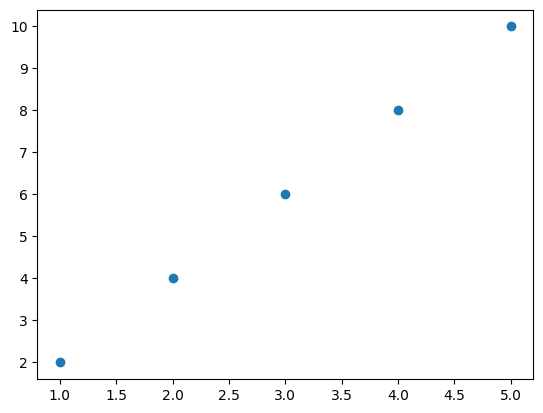

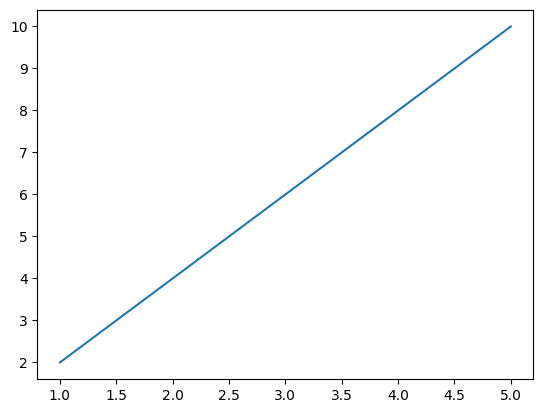

In [ ]:
x = [1,2,3,4,5]
y = [2,4,6,8,10]
plt.scatter(x,y)
plt.show()
plt.plot(x,y)
plt.show()

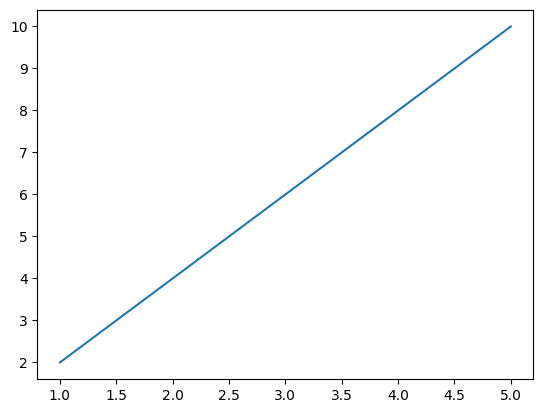

In [ ]:
plt.plot(x,y)

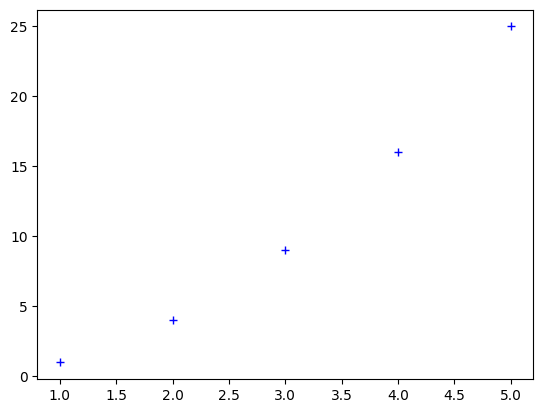

In [ ]:
x = [1,2,3,4,5]
y = [1,4,9,16,25]
plt.plot(x,y,"b+")

In [ ]:
#Plotting Functions

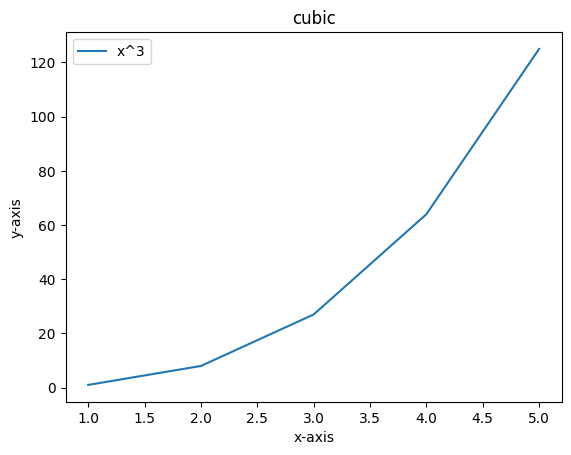

In [ ]:
import numpy as np
x = np.array([1,2,3,4,5])
y = x**3
plt.plot(x,y, label= "x^3")
plt.title("cubic")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()